# MID-SEMESTER EXAMINATION


In [1]:
from typing import Callable, Tuple
# Maitrey 1911093
# from lib.integrate import simpson
import math
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

### Question 1


Solve the following equation to an accuracy of $10^{-6}$, starting from an initial guess interval $[1.5, 2.5]$

$$
\log(x/2) - \sin(5x/2) = 0
$$

using Regula-falsi and Newton-Raphson and compare the two with respect to convergence.


In [2]:
def regfalsi(
    f, a, b, e, n
):  # f is the function, a and be represent the interval, e is the tolerance and
    # n is an upper limit on the number of iterations
    xh = 0  # initial dummy value for the root
    iterCount = []  # a list which stores the f(x_i)'s
    xiCount = []

    # the main code starts here
    for fal in range(1, n + 1):
        xh = b - (b - a) / (f(b) - f(a)) * f(b)
        iterCount.append(f(xh))
        xiCount.append(xh)
        if abs(f(xh)) < e:
            break
        elif f(a) * f(xh) < 0:
            b = xh
        else:
            a = xh
    print("Required root is: ", xh)  # printing the root
    return (
        len(iterCount),
        iterCount,
        xiCount,
    )  # return the values for plotting and tabulating purpose

In [3]:
# Maitrey 1911093

In [4]:
def newRaph(
    f, df, x0, e, n
):  # f is the function, df is the first derivative of the function
    # x0 is the dummy valriable for root
    # e is the tolerance (taken as 1.0e-5 as required in the question)
    # n is the maximum iterations
    iterCount = [
        f(x0)
    ]  # this enlists the f(x_i)'s for plotting and tabulating purposes
    xiCount = []

    # the main algorith for Newton-Rhapson here

    for i in range(n):
        xnew = x0 - f(x0) / df(x0)
        iterCount.append(f(xnew))
        xiCount.append(xnew)
        if abs(xnew - x0) < e:
            break
        x0 = xnew

    # the code for plotting and tabulating

    x3 = list(range(1, len(iterCount) + 1))
    y3 = iterCount
    y33 = xiCount
    plt.plot(x3, y3)
    plt.show()
    print("i", end=" ")
    print("x_i")
    for i in range(len(x3) - 1):
        print(x3[i], end=" ")
        print(y33[i])
    return xnew, i  # returns the value for printing the results later

In [5]:
# Maitrey 1911093

Required root is:  2.6231403379360847
Regula Falsi: 2.6231403379360847 and took 9 iterations


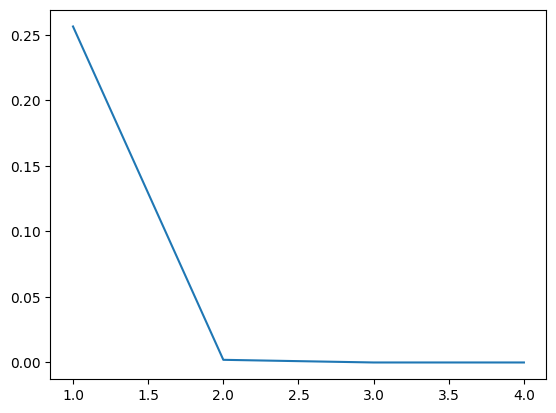

i x_i
1 2.6221385171265754
2 2.623139954182097
3 2.623140335436253
Newton Raphson: (2.623140335436253, 2)


In [6]:
def f(x):
    return math.log(x / 2) - math.sin(5 * x / 2)


def dfdx(x):
    return (1 / x) - math.cos(5 * x / 2) * 5 / 2
# Maitrey 1911093

sol_regula_falsi = regfalsi(f, 1.5, 2.5, e=1e-6, n=1000)
print(
    f"Regula Falsi: {sol_regula_falsi[2][-1]} and took {sol_regula_falsi[0]} iterations"
)
sol_newton_raphson = newRaph(f, dfdx, 2.5, e=1e-6, n=1000)
print(f"Newton Raphson: {sol_newton_raphson}")

### Question 2


In [7]:
def runge_kutta(d2ydx2, dydx, x0, y0, z0, xf, step_size):
    """Yields solution from x=x0 to x=xf
    y(x0) = y0 & y'(x0) = z0
    z = dy/dx
    """
    x = []
    y = []
    z = []  # dy/dx
    x.append(x0)
    y.append(y0)
    z.append(z0)

    n = int((xf - x0) / step_size)  # no. of steps
    for i in range(n):
        x.append(x[i] + step_size)
        k1 = step_size * dydx(x[i], y[i], z[i])
        l1 = step_size * d2ydx2(x[i], y[i], z[i])
        k2 = step_size * dydx(x[i] + step_size / 2, y[i] + k1 / 2, z[i] + l1 / 2)
        l2 = step_size * d2ydx2(x[i] + step_size / 2, y[i] + k1 / 2, z[i] + l1 / 2)
        k3 = step_size * dydx(x[i] + step_size / 2, y[i] + k2 / 2, z[i] + l2 / 2)
        l3 = step_size * d2ydx2(x[i] + step_size / 2, y[i] + k2 / 2, z[i] + l2 / 2)
        k4 = step_size * dydx(x[i] + step_size, y[i] + k3, z[i] + l3)
        l4 = step_size * d2ydx2(x[i] + step_size, y[i] + k3, z[i] + l3)

        y.append(y[i] + (k1 + 2 * k2 + 2 * k3 + k4) / 6)
        z.append(z[i] + (l1 + 2 * l2 + 2 * l3 + l4) / 6)

    return x, y, z

In [8]:
# Maitrey 1911093

In [9]:
def lagrange_interpolation(zeta_h, zeta_l, yh, yl, y):
    zeta = zeta_l + (zeta_h - zeta_l) * (y - yl) / (yh - yl)
    return zeta

100.07045334089239
x at T= 100  is the 443rd element of the X-values.
4.42999999999995


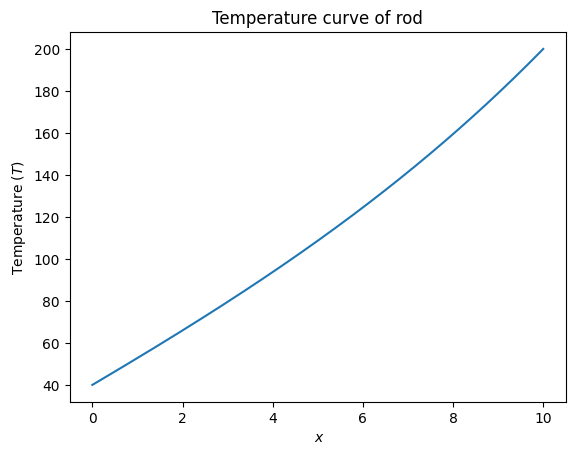

In [10]:
def shooting_method(
    d2ydx2, dydx, x0, y0, xf, yf, z_guess1, z_guess2, step_size, tol=1e-6
):
    """x0: Lower boundary value of x
    y0 = y(x0)
    xf: Upper boundary value of x
    yf = y(xf)
    z = dy/dx
    """
    x, y, z = runge_kutta(d2ydx2, dydx, x0, y0, z_guess1, xf, step_size)
    yn = y[-1]
    # Maitrey 1911093
    if abs(yn - yf) > tol:
        if yn < yf:
            zeta_l = z_guess1
            yl = yn

            x, y, z = runge_kutta(d2ydx2, dydx, x0, y0, z_guess2, xf, step_size)
            yn = y[-1]

            if yn > yf:
                zeta_h = z_guess2
                yh = yn

                # calculate zeta using Lagrange interpolation
                zeta = lagrange_interpolation(zeta_h, zeta_l, yh, yl, yf)

                # using this zeta to solve using RK4
                x, y, z = runge_kutta(d2ydx2, dydx, x0, y0, zeta, xf, step_size)
                return x, y, z

            else:
                print("Bracketing FAIL! Try another set of guesses.")

        elif yn > yf:
            zeta_h = z_guess1
            yh = yn

            x, y, z = runge_kutta(d2ydx2, dydx, x0, y0, z_guess2, xf, step_size)
            yn = y[-1]

            if yn < yf:
                zeta_l = z_guess2
                yl = yn

                # calculate zeta using Lagrange interpolation
                zeta = lagrange_interpolation(zeta_h, zeta_l, yh, yl, yf)

                x, y, z = runge_kutta(d2ydx2, dydx, x0, y0, zeta, xf, step_size)
                return x, y, z

            else:
                print("Bracketing FAIL! Try another set of guesses.")

    else:
        return x, y, z  # bang-on solution with z_guess1


# def shooting_method(d2ydx2, dydx, x0, y0, xf, yf, z_guess1, z_guess2, step_size, tol=1e-6):
# this is func for d2y/dt2 =func
def d2ydt2(t, y, z):
    return -0.01 * (20 - y)
# Maitrey 1911093

# z = dy/dt
def dydt(t, y, z):
    return z


# Defining boundary values
t_initial = 0
t_final = 10
y_initial = 40
y_final = 200

t, y, z = shooting_method(
    d2ydt2, dydt, t_initial, y_initial, t_final, y_final, 10, 100, step_size=0.01
)
print(y[443])
print(
    "x at T= 100  is the 443rd element of the X-values."
)  # this can be improved by changing step-size
print(t[443])
plt.plot(t, y)
plt.xlabel(" $x$")
plt.ylabel("Temperature $(T)$")
plt.title("Temperature curve of rod")
plt.show()

### Question 4


### Formulation of the problem:

$$
x_{\text{COM}} = \dfrac{\int_0^L x dm}{\int_0^L dm}
$$

where

$$
dm = \lambda dx
$$

Therefore, we have

$$
 = \dfrac{\int_0^L x^4 dx}{\int_0^L x^3 dx}
$$

which when solved gives us $x_{\text{COM}} = \dfrac{3 L}{4}$.


In [11]:
def simpson(
    func: Callable,
    bounds: Tuple[float, float],
    tol: float,
    maximum_value_of_error_func: float,
) -> float:
    """
    Integrate a function using Simpson's rule.

    Parameters
    ----------
    func : Callable
        The function to integrate.

    a : float
        The lower limit of integration.

    b : float
        The upper limit of integration.

    n : int
        The number of intervals to use.

    Returns
    -------
    float
        The value of the integral.
    """
    a, b = bounds
    n = int(((b - a) ** 5 / 180 / tol * maximum_value_of_error_func) ** (1 / 4))

    if n % 2 != 0:
        n += 1

    h = (b - a) / n

    # create an array of x values
    x = [a + i * h for i in range(n + 1)]
    x[0] = func(x[0])
    x[-1] = func(x[-1])
    for i in range(1, len(x) - 1):
        if i % 2 == 0:
            x[i] = 2 * func(x[i])
        else:
            x[i] = 4 * func(x[i])
    # Maitrey 1911093
    return h / 3 * sum(x)

In [12]:
def problem_four():
    """
    Variation of mass density of the rod with respect to x.
    """

    # Define numerator and denominator functions
    def numerator(x):
        return x**3

    def denominator(x):
        return x**2

    # integrate numerator
    numerator_integral = simpson(
        numerator, (0, 2), tol=1e-4, maximum_value_of_error_func=24
    )
    print(numerator_integral)
    # integrate denominator
    denominator_integral = simpson(
        denominator, (0, 2), tol=1e-4, maximum_value_of_error_func=24
    )
    print(denominator_integral)
    sol = numerator_integral / denominator_integral

    print(f"The center of mass of the rod is at x = {sol}")


problem_four()

3.999999999999999
2.666666666666666
The center of mass of the rod is at x = 1.5


### Question 5

In [13]:
# Maitrey 1911093

In [14]:
def lu_decomposition(A):
    n = A.shape[0]
    U = A.astype(float)  # Convert to float64
    L = np.identity(n)
    for j in range(n - 1):
        for i in range(j + 1, n):
            coeff = U[i, j] / U[j, j]
            U[i, j:] -= coeff * U[j, j:]
            L[i, j] = coeff
    return L, U


def forward_sub(L, bs):
    n = bs.size
    xs = np.zeros(n)
    for i in range(n):
        xs[i] = (bs[i] - L[i, :i] @ xs[:i]) / L[i, i]
    return xs


def backward_sub(U, bs):
    n = bs.size
    xs = np.zeros(n)
    for i in reversed(range(n)):
        xs[i] = (bs[i] - U[i, i + 1 :] @ xs[i + 1 :]) / U[i, i]
    return xs


def lu_solve(A, bs):
    L, U = lu_decomposition(A)
    ys = forward_sub(L, bs.astype(float))  # Convert bs to float64
    xs = backward_sub(U, ys)
    return xs



A = np.array(
    [
        [1, -1, 4, 0, 2, 9],
        [0, 5, -2, 7, 8, 4],
        [1, 0, 5, 7, 3, -2],
        [6, -1, 2, 3, 0, 8],
        [-4, 2, 0, 5, -5, 3],
        [0, 7, -1, 5, 4, -2],
    ]
)

bs = np.array([19, 2, 13, -7, -9, 2])

result = lu_solve(A, bs)
print("Solution:", result)
print(np.linalg.solve(A, bs))

Solution: [-1.76181704  0.89622803  4.0519314  -1.6171308   2.04191354  0.15183249]
[-1.76181704  0.89622803  4.0519314  -1.6171308   2.04191354  0.15183249]


In [15]:
# Maitrey 1911093

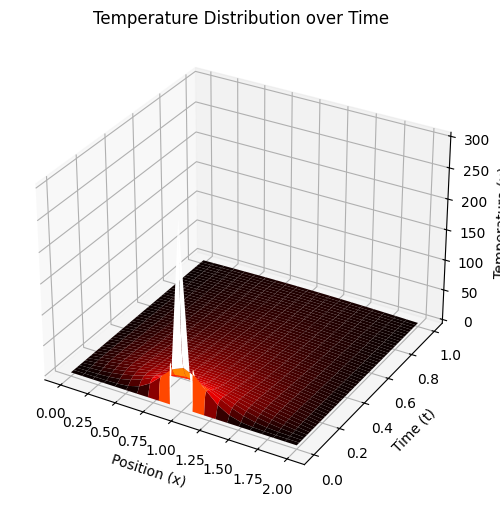

In [16]:
# Parameters
L = 2  # Length of the bar
T = 1  # Total time
Nx = 21  # Number of spatial grid points
Nt = 2000  # Number of temporal grid points
dx = L / (Nx - 1)  # Spatial step size
dt = T / Nt  # Temporal step size

# Check stability condition
if dt > 0.5 * (dx**2):
    print("Warning: Unstable solution, choose smaller time step!")

# Initial condition
u = np.zeros((Nt, Nx))
u[0, int((Nx - 1) / 2)] = 300  # Heating at the center

# Boundary conditions
u[:, 0] = u[:, -1] = 0

# Finite difference method
for n in range(Nt - 1):
    for i in range(1, Nx - 1):
        u[n + 1, i] = u[n, i] + (dt / (dx**2)) * (
            u[n, i + 1] - 2 * u[n, i] + u[n, i - 1]
        )

# Plotting
x_values = np.linspace(0, L, Nx)
t_values = np.linspace(0, T, Nt)
X, T = np.meshgrid(x_values, t_values)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, T, u, cmap="hot")
ax.set_xlabel("Position (x)")
ax.set_ylabel("Time (t)")
ax.set_zlabel("Temperature (u)")
ax.set_title("Temperature Distribution over Time")
plt.show()